In [1]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

# Create a Client to Connect to Tiingo
client = TiingoClient()

# Create Start and End Dates for the Last 30 Days
end = datetime.now()
start = end + timedelta(-30)

In [2]:
# Create DataFrames for China
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_df = us_ticker_df.rename(columns={'IGM':'IGM (Technology)', 'IYE':'IYE (Energy)', 'IYM':'IYM (Materials)', 'IYH':'IYH (Healthcare)', 'IECS':'IECS (Consumer Staples)'})
us_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,326.65,250.76,32.10,95.07,217.63,28.564
2020-01-10 00:00:00+00:00,325.71,250.35,31.90,94.51,217.80,28.586
2020-01-13 00:00:00+00:00,327.95,253.39,31.92,95.85,216.87,28.803
2020-01-14 00:00:00+00:00,327.45,251.90,31.94,95.86,218.16,28.788
2020-01-15 00:00:00+00:00,328.19,252.33,31.75,96.25,220.01,29.007


In [3]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    0
dtype: int64

In [4]:
us_df.dropna(inplace=True)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    0
dtype: int64

In [5]:
# Calculate the Daily Returns for China Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,-0.002878,-0.001635,-0.006231,-0.005890,0.000781,0.000770
2020-01-13 00:00:00+00:00,0.006877,0.012143,0.000627,0.014178,-0.004270,0.007591
2020-01-14 00:00:00+00:00,-0.001525,-0.005880,0.000627,0.000104,0.005948,-0.000521
2020-01-15 00:00:00+00:00,0.002260,0.001707,-0.005949,0.004068,0.008480,0.007607


In [6]:
# Calculate the Value of Average Daily Returns
#avg_daily_returns_spy = us_daily_returns.mean()['SPY']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (Consumer Staples)']

# Calculate the Standard Deviation 
#std_daily_returns_spy = us_daily_returns.std()['SPY']
std_daily_returns_igm = us_daily_returns.std()['IGM (Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (Consumer Staples)']

# Save the Last Day's Closing Price
#spy_last_price = us_df['SPY'][-1]
igm_last_price = us_df['IGM (Technology)'][-1]
iye_last_price = us_df['IYE (Energy)'][-1]
iym_last_price = us_df['IYM (Materials)'][-1]
iyh_last_price = us_df['IYH (Healthcare)'][-1]
iecs_last_price = us_df['IECS (Consumer Staples)'][-1]

In [7]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [8]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
    #monte_carlo['SPY prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + us_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001425,0.000132,0.000959,-0.000297,0.002753,0.002323,-0.001278,0.002764,-0.002534,-0.010605,...,-0.008840,-0.007605,0.005803,0.000618,0.001144,-0.007575,0.007610,-0.002085,0.007026,0.000358
2,0.002088,-0.003921,-0.001924,0.000749,0.003714,-0.005976,0.003357,-0.001584,0.005411,-0.005575,...,0.006623,-0.020476,-0.001959,-0.003887,-0.003932,-0.006239,0.007988,-0.006601,0.004664,-0.000971
3,0.007695,-0.004729,-0.006340,0.003058,0.018508,-0.004350,0.002989,-0.004987,0.004299,-0.009102,...,0.004406,-0.019648,-0.003731,-0.003017,-0.010542,-0.008639,0.008757,-0.017841,0.006529,-0.000187
4,0.010979,-0.003543,-0.007084,0.006046,0.018787,-0.004603,0.006718,-0.008646,0.009457,-0.007634,...,0.005723,-0.016376,-0.011428,-0.016217,-0.009344,-0.013599,0.012925,-0.008066,0.002929,0.006968


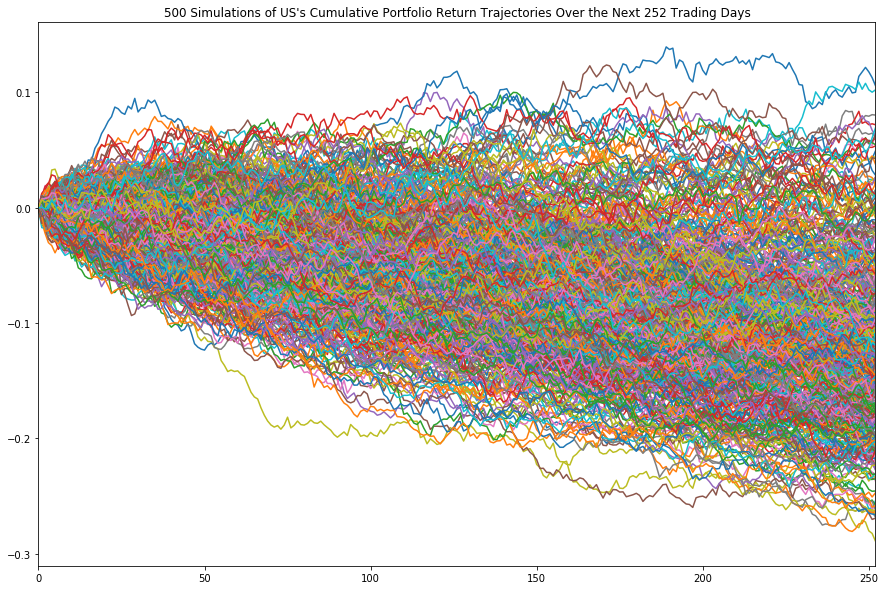

In [9]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))